In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
car = pd.read_csv("Car details v3.csv")

In [3]:
name = car[['name','selling_price']]
del car['name'],

In [4]:
car.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
car.shape

(8128, 12)

In [6]:
car.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
car['mileage'] = car['mileage'].str.replace('kmpl','')
car['mileage'] = car['mileage'].str.replace('km/kg','')
car['mileage'] = car['mileage'].astype(str).astype(float)

In [8]:
car.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [9]:
car['engine'] = car['engine'].str.replace('CC','')
car['engine'].value_counts()

1248     1017
1197      832
998       453
796       444
2179      389
         ... 
2835        1
1489        1
1422        1
2496        1
1950        1
Name: engine, Length: 121, dtype: int64

C:\Users\biltu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='engine', ylabel='Density'>

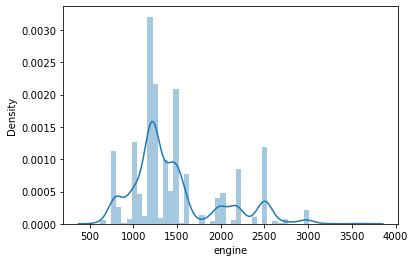

In [10]:
sns.distplot(car['engine'])

In [11]:
# car['engine'].fillna(1248,inplace=True)

In [12]:

# car['engine'] = car['engine'].str.replace('nan','')
car['engine'] = car['engine'].astype(float)

In [13]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   float64
 8   engine         7907 non-null   float64
 9   max_power      7913 non-null   object 
 10  torque         7906 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [14]:
car.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

C:\Users\biltu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

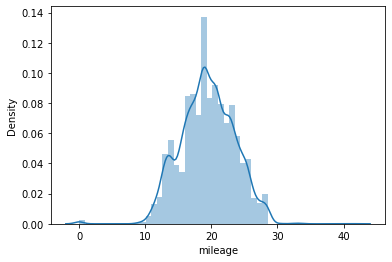

In [15]:
sns.distplot(car['mileage'])

In [16]:
car['mileage'].mean(),car['mileage'].median()

(19.418783356519516, 19.3)

In [17]:
# car['mileage'].fillna(car['mileage'].median(),inplace=True)

In [18]:
print(car['fuel'].value_counts())
print('---'*20)
print(car['seller_type'].value_counts())
print('---'*20)
print(car['transmission'].value_counts())
print('---'*20)
print(car['owner'].value_counts())


Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64
------------------------------------------------------------
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64
------------------------------------------------------------
Manual       7078
Automatic    1050
Name: transmission, dtype: int64
------------------------------------------------------------
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64


In [19]:
from sklearn import preprocessing

lab_encoder = preprocessing.LabelEncoder()
car['fuel'] = lab_encoder.fit_transform(car['fuel'])

In [20]:
car['seller_type'] = lab_encoder.fit_transform(car['seller_type'])
car['transmission'] = lab_encoder.fit_transform(car['transmission'])
car['owner'] = lab_encoder.fit_transform(car['owner'])

In [21]:
car.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,1,1,1,0,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,3,1,1,4,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,1,1,1,0,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,3,1,1,0,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [22]:
print(car['fuel'].value_counts())
print('---'*20)
print(car['seller_type'].value_counts())
print('---'*20)
print(car['transmission'].value_counts())
print('---'*20)
print(car['owner'].value_counts())

1    4402
3    3631
0      57
2      38
Name: fuel, dtype: int64
------------------------------------------------------------
1    6766
0    1126
2     236
Name: seller_type, dtype: int64
------------------------------------------------------------
1    7078
0    1050
Name: transmission, dtype: int64
------------------------------------------------------------
0    5289
2    2105
4     555
1     174
3       5
Name: owner, dtype: int64


In [23]:
car.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,1,1,1,0,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,3,1,1,4,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,1,1,1,0,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,3,1,1,0,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [24]:
car.corr()['selling_price']

year             0.414092
selling_price    1.000000
km_driven       -0.225534
fuel            -0.194029
seller_type     -0.335857
transmission    -0.588845
owner           -0.229174
mileage         -0.126054
engine           0.455734
seats            0.041358
Name: selling_price, dtype: float64

In [25]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   int32  
 4   seller_type    8128 non-null   int32  
 5   transmission   8128 non-null   int32  
 6   owner          8128 non-null   int32  
 7   mileage        7907 non-null   float64
 8   engine         7907 non-null   float64
 9   max_power      7913 non-null   object 
 10  torque         7906 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(3), int32(4), int64(3), object(2)
memory usage: 635.1+ KB


In [26]:
car['max_power'] = car['max_power'].apply(str)

In [27]:
car['max_power'].dtypes

dtype('O')

In [28]:
import re
car['max_power']  = car['max_power'].apply(lambda x : re.findall(r'\d+', x))

In [29]:
def convert(x):
    if len(x)==0:
        return 0
    return x[0]

In [30]:
car['max_power']=car['max_power'].apply(lambda x : convert(x))

In [31]:
car['max_power'] = car['max_power'].apply(int)

C:\Users\biltu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='max_power', ylabel='Density'>

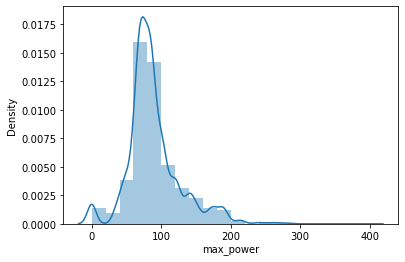

In [32]:
sns.distplot(car['max_power'],bins=20)

In [33]:
car[car['max_power']==0]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,2007,200000,80000,3,1,1,2,NaN,NaN,0,NaN,NaN
31,2003,70000,50000,3,1,1,2,NaN,NaN,0,NaN,NaN
78,2003,50000,70000,1,1,1,0,NaN,NaN,0,NaN,NaN
87,2015,475000,78000,1,0,1,0,NaN,NaN,0,NaN,NaN
119,2010,300000,120000,1,1,1,2,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7846,2000,200000,100000,1,1,1,0,NaN,NaN,0,NaN,NaN
7996,2000,140000,50000,3,1,1,2,NaN,NaN,0,NaN,NaN
8009,2006,145000,80000,3,1,1,2,NaN,NaN,0,NaN,NaN
8068,2017,580000,165000,1,1,1,0,NaN,NaN,0,NaN,NaN


In [34]:
car['max_power'].mean(),car['max_power'].median()

(88.77817421259843, 81.0)

In [35]:
car.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,1,1,1,0,23.40,1248.0,74,190Nm@ 2000rpm,5.0
1,2014,370000,120000,1,1,1,2,21.14,1498.0,103,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,3,1,1,4,17.70,1497.0,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,1,1,1,0,23.00,1396.0,90,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,3,1,1,0,16.10,1298.0,88,"11.5@ 4,500(kgm@ rpm)",5.0


In [36]:
car.fillna(car.median(),inplace=True)

C:\Users\biltu\AppData\Local\Temp\ipykernel_14872\2215940749.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  car.fillna(car.median(),inplace=True)


In [37]:
car.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,1,1,1,0,23.40,1248.0,74,190Nm@ 2000rpm,5.0
1,2014,370000,120000,1,1,1,2,21.14,1498.0,103,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,3,1,1,4,17.70,1497.0,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,1,1,1,0,23.00,1396.0,90,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,3,1,1,0,16.10,1298.0,88,"11.5@ 4,500(kgm@ rpm)",5.0


In [38]:
from matplotlib import pyplot as plt

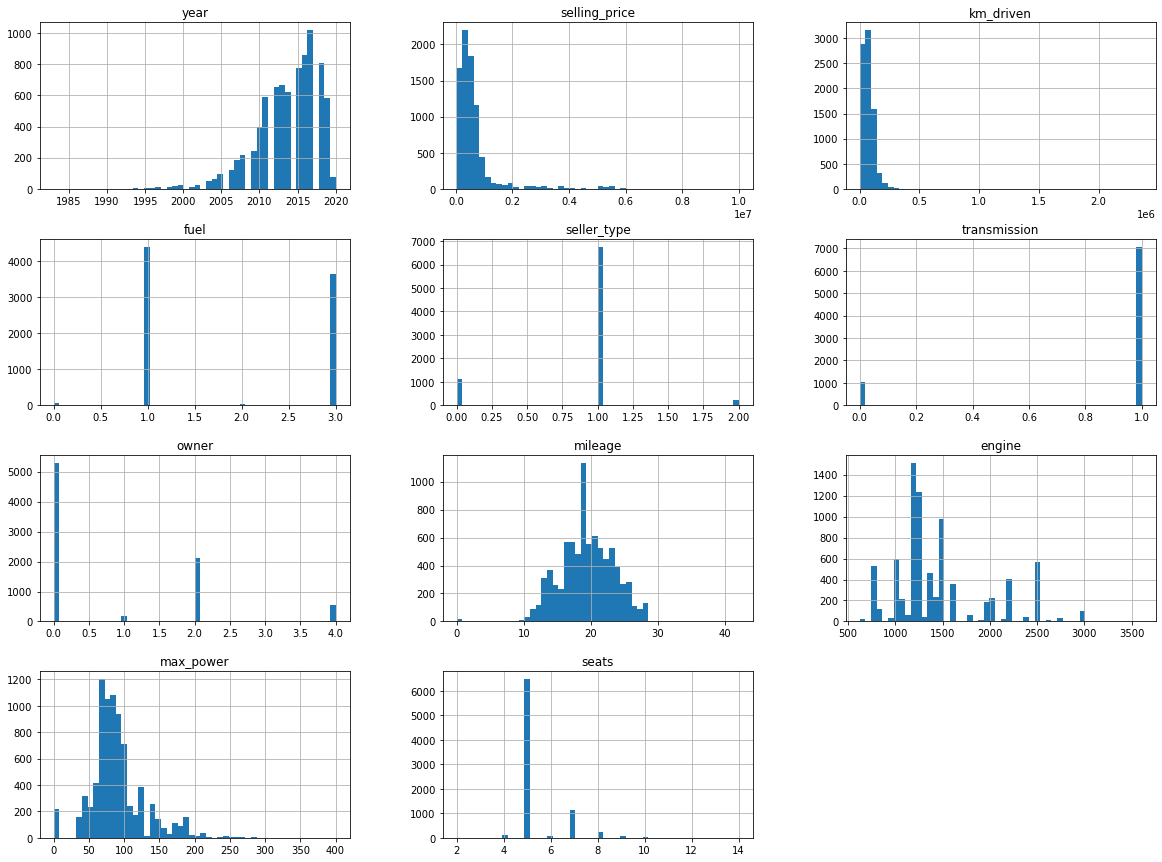

In [39]:
car.hist(bins=50,figsize=(20,15))
plt.show()

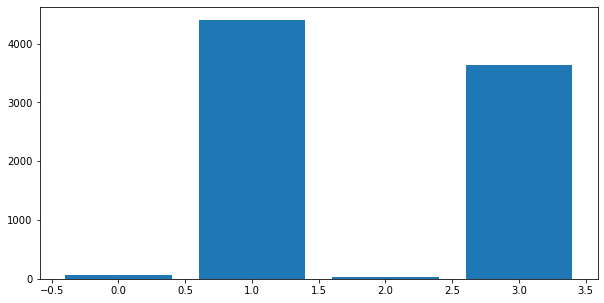

In [40]:
plt.figure(figsize=(10,5))
plt.bar(list(car['fuel'].value_counts().keys()[0:5]),list(car['fuel'].value_counts().values)[0:5])
plt.show()

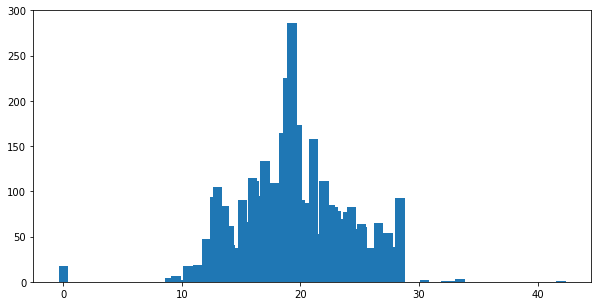

In [41]:
plt.figure(figsize=(10,5))
plt.bar(list(car['mileage'].value_counts().keys()),list(car['mileage'].value_counts().values))
plt.show()

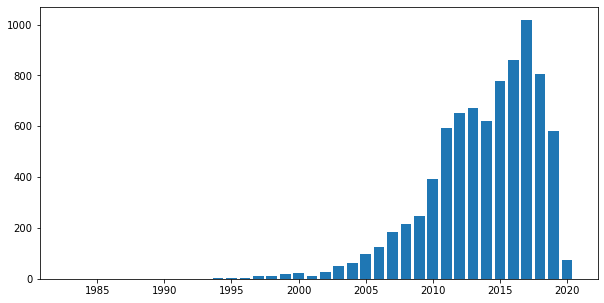

In [42]:
plt.figure(figsize=(10,5))
plt.bar(list(car['year'].value_counts().keys()),list(car['year'].value_counts().values))
plt.show()

In [43]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   int32  
 4   seller_type    8128 non-null   int32  
 5   transmission   8128 non-null   int32  
 6   owner          8128 non-null   int32  
 7   mileage        8128 non-null   float64
 8   engine         8128 non-null   float64
 9   max_power      8128 non-null   int64  
 10  torque         7906 non-null   object 
 11  seats          8128 non-null   float64
dtypes: float64(3), int32(4), int64(4), object(1)
memory usage: 635.1+ KB


In [44]:
car.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,1,1,1,0,23.40,1248.0,74,190Nm@ 2000rpm,5.0
1,2014,370000,120000,1,1,1,2,21.14,1498.0,103,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,3,1,1,4,17.70,1497.0,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,1,1,1,0,23.00,1396.0,90,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,3,1,1,0,16.10,1298.0,88,"11.5@ 4,500(kgm@ rpm)",5.0


## Train test split

In [45]:
bdcjk

NameError: name 'bdcjk' is not defined

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x = car.drop(['selling_price','torque'],axis=1)
y = car['selling_price'].copy()

In [48]:
x_train ,x_test ,y_train,y_test = train_test_split(x,y ,test_size=0.3)

In [49]:
x_train.shape , x_test.shape , y_train.shape

((5689, 10), (2439, 10), (5689,))

In [50]:

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
y_predict = model.predict(x_train)
model.score(x_test,y_test)

0.9722653605288868

In [ ]:

# from sklearn.ensemble import ExtraTreesRegressor
# model_ET = ExtraTreesRegressor()
# model_ET.fit(x_train,y_train)
# y_predict = model_ET.predict(x_train)
# model_ET.score(x_test,y_test)

In [ ]:

# from sklearn.svm import SVR
# model_svr = SVR()
# model_svr.fit(x_train,y_train)
# y_predict = model_svr.predict(x_train)
# # model_svr.score(x_test,y_test)

In [51]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_train,y_predict))

62870.47800022997

In [52]:

from sklearn.metrics import r2_score

r2 = r2_score(y_train,y_predict)
print(r2)

0.9940046597246661


# ploting the actual and predicted price

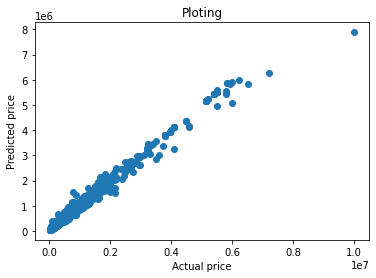

In [53]:
plt.scatter(y_train,y_predict)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Ploting")
plt.show()

In [54]:
a = list(y_train[0:10])
b = list(y_predict[0:10])
data = {'actual':a,'predicted':b}
df = pd.DataFrame(data)

In [55]:
df

,actual,predicted
0,347000,3.107100e+05
1,550000,5.566875e+05
2,250000,2.048700e+05
3,675000,6.556000e+05
4,200000,1.839429e+05
5,156000,1.675500e+05
6,256000,2.834700e+05
7,2000000,2.000000e+06
8,90000,7.755000e+04
9,490000,5.729917e+05


## Testing the model

In [56]:
test_predict = model.predict(x_test)

In [57]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,test_predict)
print(r2)

0.9722653605288868


In [58]:
model

RandomForestRegressor()

In [59]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [60]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5689 entries, 3286 to 5079
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5689 non-null   int64  
 1   km_driven     5689 non-null   int64  
 2   fuel          5689 non-null   int32  
 3   seller_type   5689 non-null   int32  
 4   transmission  5689 non-null   int32  
 5   owner         5689 non-null   int32  
 6   mileage       5689 non-null   float64
 7   engine        5689 non-null   float64
 8   max_power     5689 non-null   int64  
 9   seats         5689 non-null   float64
dtypes: float64(3), int32(4), int64(3)
memory usage: 400.0 KB


In [ ]:
car['seats'].value_counts()

In [ ]:
car[:567]

In [ ]:
x_train['fuel'].value_counts(),car['fuel'].value_counts()

In [ ]:
x_train['seller_type'].value_counts(),car['seller_type'].value_counts()

In [ ]:
x_train['transmission'].value_counts(),car['transmission'].value_counts()


In [ ]:
x_train['owner'].value_counts(),car['owner'].value_counts()

In [ ]:
car.iloc[0]

In [65]:
model.predict([[2014.0, 145500.0, 1.0, 1.0, 1.0, 0.0, 23.4, 1248.0, 74.0, 5.0]])

C:\Users\biltu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([507191.55166667])

In [62]:
468514-450000.0

18514.0

In [64]:
x_train

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
3286,2011,30000,3,1,1,0,19.00,998.0,66,5.0
6074,2017,20000,3,1,1,0,21.21,1197.0,81,5.0
1425,2015,20000,3,1,0,0,21.90,624.0,37,4.0
7972,2016,108000,1,0,1,0,23.65,1248.0,88,5.0
882,2012,70000,1,1,1,2,25.44,936.0,57,5.0
...,...,...,...,...,...,...,...,...,...,...
2620,2015,30000,3,1,1,0,18.90,1197.0,82,5.0
6984,2013,120000,1,1,1,4,15.96,2523.0,62,9.0
4686,2008,120000,3,1,1,0,11.10,2354.0,158,5.0
2523,2015,34000,3,1,1,2,21.10,814.0,55,5.0


In [110]:
car.iloc[]

AttributeError: 'list' object has no attribute 'iloc'

In [67]:
511699-500000

11699

In [69]:
max(car['selling_price'])

10000000

In [70]:
car[car['selling_price']==10000000]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
170,2017,10000000,30000,3,1,0,0,42.0,1969.0,400,640Nm@ 1740rpm,4.0


In [71]:
7818700-10000000

-2181300

In [ ]:
p = 507191
name[(name['selling_price']<=p+100000) | (name['selling_price']>=p-100000)]

In [97]:
s = name['selling_price'].between(p-20000,p+20000)

In [106]:
car_list = list(name[s].sort_values(by='selling_price',ascending=False)[:5]['name'].values)

In [109]:
name.to_csv('name.csv',index=False)